In [1]:
import pandas as pd
from sqlalchemy import create_engine
import numpy as np
import requests
import json
import prettytable
import xmltodict, json
from pandas.io.json import json_normalize
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
zill_url="http://www.zillow.com/webservice/GetRegionChildren.htm?zws-id=X1-ZWz17giky9jf9n_43hp8&state=ca&child=zipcode"
response_zill = requests.get(zill_url).content
resp_zill = xmltodict.parse(response_zill)

json.dumps(resp_zill)
regionchildren_df = pd.DataFrame.from_dict(json_normalize(resp_zill), orient='columns')
regionchildren_df.rename(columns=lambda x: x[30:], inplace=True)
#print(regionchildren_df.head(5))

region_list = pd.DataFrame(regionchildren_df['response.list.region'][0])
#dropna and reset index
region_list.dropna(how="any", inplace=True)
region_list.reset_index(drop=True, inplace=True)

region_list["USD"] = [d.get('#text') for d in region_list.zindex]

region_list = region_list.drop(["zindex"], axis=1)

region_list.head()

C:\Users\bandi\.conda\envs\pythonml\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,id,name,latitude,longitude,USD
0,3101,Los Angeles County,33.786617,-118.298661,485600
1,2841,San Diego County,33.01693,-116.84601,463800
2,1286,Orange County,33.640752,-117.769443,627200
3,2832,Riverside County,33.752886,-116.055616,298200
4,3250,San Bernardino County,34.840034,-115.96705,257400


In [3]:
region_list["USD"] = pd.to_numeric(region_list["USD"])
region_list["latitude"] = region_list["latitude"].astype(float)
region_list["longitude"] = region_list["longitude"].astype(float)

In [4]:
print(region_list.dtypes)
print(region_list.head(10))

id            object
name          object
latitude     float64
longitude    float64
USD            int64
dtype: object
     id                   name   latitude   longitude     USD
0  3101     Los Angeles County  33.786617 -118.298661  485600
1  2841       San Diego County  33.016930 -116.846010  463800
2  1286          Orange County  33.640752 -117.769443  627200
3  2832       Riverside County  33.752886 -116.055616  298200
4  3250  San Bernardino County  34.840034 -115.967050  257400
5  3136     Santa Clara County  37.189396 -121.705326  830300
6  1510         Alameda County  37.680181 -121.921497  614500
7  3017      Sacramento County  38.377411 -121.444473  283200
8  3159    Contra Costa County  37.909254 -121.987842  469500
9  1018          Fresno County  36.746376 -119.639657  184900


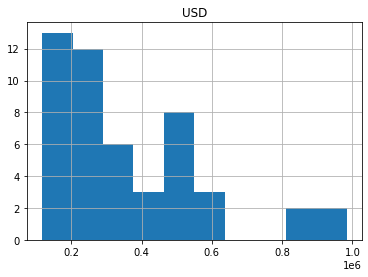

In [5]:
region_list.hist(column='USD')
plt.show()

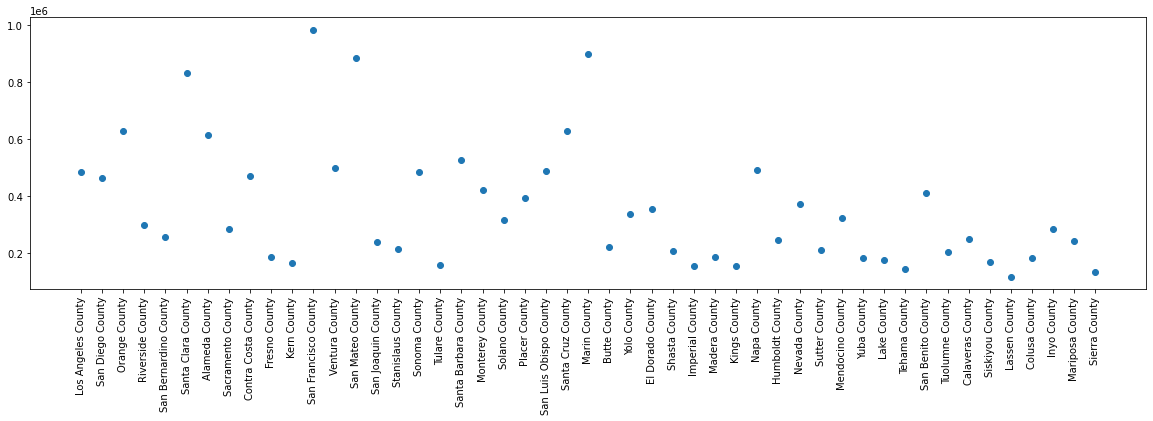

In [6]:

plt.figure(figsize=(20,5))
plt.scatter(region_list['name'], region_list['USD'])
plt.xticks(rotation=90)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
X = region_list[['latitude', 'longitude']]
y = region_list['USD']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)


In [22]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
reg = MultiOutputRegressor(RandomForestRegressor()) 
#model=linear_model.LinearRegression()
reg.fit(X_train, y_train)


ValueError: y must have at least two dimensions for multi-output regression but has only one.

In [13]:
model.predict(X_test, y_test)

TypeError: predict() takes 2 positional arguments but 3 were given

In [8]:
from sklearn import linear_model
model=linear_model.LinearRegression()
model.fit(region_list[['latitude','longitude']], region_list.USD)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
model.coef_

array([-105670.57088471, -109610.07071776])

In [10]:
model.intercept_

-8903335.549487952

In [ ]:
model.predict([])

In [12]:
region_list.isnull().sum()

id           0
name         0
latitude     0
longitude    0
USD          0
dtype: int64

In [25]:
model.predict(np.array([33.786617],[-118.298661]).reshape(1,1))

TypeError: data type not understood